In [9]:
#for advertising analytics and data manipulation
import advertools as adv

# for analysing data
import pandas as pd

# parses user agent strings to extract information about user browser , device , OS
from ua_parser import user_agent_parser

import ua_parser

#sets no limit to number of columns displayed
pd.options.display.max_columns = None

# iterate over libraries and tell their versions
for p in[adv,pd]:
  print(f"{p.__name__:-<14} -- {p.__version__}")

advertools---- -- 0.13.5
pandas-------- -- 2.0.3


In [2]:
# checking the first few lines of our log file
log_file_path = "log_file.log"

with open(log_file_path, "r") as f1:
    for i in range(10):  # Adjust the number of lines you want to display
        line = f1.readline()
        if not line:
            break
        print(line, end="")

87.116.74.253 - - [28/Feb/2022:14:04:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.109 Safari/537.36"
91.196.124.220 - - [28/Feb/2022:14:04:47 +0200] "POST /wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646049887.2476160526275634765625" "WordPress/5.9.1; https://nargile.bg"
91.196.124.220 - - [28/Feb/2022:14:06:45 +0200] "POST /wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000 HTTP/1.1" 200 - "https://nargile.bg/wp-cron.php?doing_wp_cron=1646050005.3947830200195312500000" "WordPress/5.9.1; https://nargile.bg"
87.116.74.253 - - [28/Feb/2022:14:06:44 +0200] "POST /wp-admin/admin-ajax.php HTTP/2.0" 200 47 "https://nargile.bg/wp-admin/admin.php?page=wc-settings" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHT

In [3]:
# measures the time of execution
%time

import os

log_file = 'log_file.log'
output_file = 'output_file.parquet'
errors_file = 'errors_file.txt'

# Process log files and convert them into dataframe
# it saves the data in parquet file
if not os.path.exists(output_file) and not os.path.exists(errors_file):
    adv.logs_to_df(
        log_file=log_file,
        output_file=output_file,
        errors_file=errors_file,
        log_format='combined'
    )
else:
    print("Output or errors files already exist.")

CPU times: total: 0 ns
Wall time: 0 ns
Output or errors files already exist.


In [4]:
# reading the parquet file into pandas dataframe
logs_df = pd.read_parquet('output_file.parquet')

In [5]:
# changing the datetime column into date time format
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],
                                     format='%d/%b/%Y:%H:%M:%S %z')

In [6]:
logs_df.head(5)

,client,userid,datetime,method,request,status,size,referer,user_agent
0,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/wooc...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
1,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/libs/magnific-p...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
2,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/wc/acti...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
3,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/element...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...
4,87.120.68.47,-,2022-03-10 16:22:45+02:00,GET,/wp-content/themes/woodmart/js/scripts/global/...,304,NaN,https://nargile.bg/product/ocean-hookah-lit-bl...,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...


In [7]:
# Reverse DNS lookup on client column
host_df = adv.reverse_dns_lookup(logs_df['client'])

In [8]:
# Checking shape after reverse dns lookup on client column
print(f'Rows, columns: {host_df.shape}')

Rows, columns: (14245, 9)


In [9]:
# Viewing first 5
host_df.head(5)

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,178.62.71.222,69632,69632,0.028707,0.028707,None,None,None,[Errno 11004] host not found
1,178.62.81.205,68664,138296,0.028308,0.057014,None,None,None,[Errno 11004] host not found
2,46.101.77.196,68298,206594,0.028157,0.085171,None,None,None,[Errno 11004] host not found
3,91.196.124.220,40230,246824,0.016585,0.101756,ns77.superhosting.bg,,91.196.124.220,None
4,84.238.171.44,27567,274391,0.011365,0.113121,84-238-171-44.ip.btc-net.bg,,84.238.171.44,None


In [10]:
# combing ip address and hostname from host_df dataframe
ip_host_dict = dict(zip(host_df['ip_address'], host_df['hostname']))

In [11]:
# creating a new column hostname in logs_df and then putting the host name from host_df dictionary based on Ip addresses found in client column 
logs_df['hostname'] = [ip_host_dict[ip] for ip in logs_df['client']]

In [12]:
from urllib.parse import urlparse

# Parse URL components using urlparse and create a DataFrame
request_url_components = logs_df['request'].apply(lambda url: urlparse(url))
request_url_df = pd.DataFrame(request_url_components.tolist(), columns=['scheme', 'netloc', 'path', 'params', 'query', 'fragment'])

# Add a prefix to column names
request_url_df = request_url_df.add_prefix('request_')


In [13]:
# PREFIX adding means now names will be request_scheme , request_domain , etc#
#request_url_df = request_url_df.add_prefix('request_')
print(f"rows and columns : {request_url_df.shape}")

rows and columns : (2425637, 6)


In [14]:
print(request_url_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425637 entries, 0 to 2425636
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   request_scheme    object
 1   request_netloc    object
 2   request_path      object
 3   request_params    object
 4   request_query     object
 5   request_fragment  object
dtypes: object(6)
memory usage: 111.0+ MB
None


In [15]:
#Seeing first 6
request_url_df.head(6)

,request_scheme,request_netloc,request_path,request_params,request_query,request_fragment
0,,,/wp-content/themes/woodmart/js/scripts/wc/wooc...,,ver=6.3.1,
1,,,/wp-content/themes/woodmart/js/libs/magnific-p...,,ver=6.3.1,
2,,,/wp-content/themes/woodmart/js/scripts/wc/acti...,,ver=6.3.1,
3,,,/wp-content/themes/woodmart/js/scripts/element...,,ver=6.3.1,
4,,,/wp-content/themes/woodmart/js/scripts/global/...,,ver=6.3.1,
5,,,/wp-content/themes/woodmart/js/libs/tooltips.m...,,ver=6.3.1,


In [16]:
#referer_url_df = adv.url_to_df(logs_df['referer'])
# Parse URL components using urlparse and create a DataFrame

referer_url_components = logs_df['referer'].apply(lambda url: urlparse(url))

referer_url_df = pd.DataFrame(referer_url_components.tolist(), columns=['scheme', 'netloc', 'path', 'params', 'query', 'fragment'])

In [17]:
#Adding prefix
referer_url_df = referer_url_df.add_prefix('referer_')

In [18]:
print(f"rows and columns : {referer_url_df.shape}")

rows and columns : (2425637, 6)


In [19]:
print(request_url_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425637 entries, 0 to 2425636
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   request_scheme    object
 1   request_netloc    object
 2   request_path      object
 3   request_params    object
 4   request_query     object
 5   request_fragment  object
dtypes: object(6)
memory usage: 111.0+ MB
None


In [20]:
#Seeing first 6
referer_url_df.head(6)

,referer_scheme,referer_netloc,referer_path,referer_params,referer_query,referer_fragment
0,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
1,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
2,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
3,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
4,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,
5,https,nargile.bg,/product/ocean-hookah-lit-black-hmd-za-nargile/,,,


In [21]:
ua_df = pd.json_normalize([user_agent_parser.Parse(ua) for ua in logs_df['user_agent']])

In [22]:
#Converting columns of ua_df to ua_ + name
ua_df.columns = 'ua_' + ua_df.columns.str.replace('user_agent\.', '', regex=True)

In [23]:
ua_df.head(10)

,ua_string,ua_family,ua_major,ua_minor,ua_patch,ua_os.family,ua_os.major,ua_os.minor,ua_os.patch,ua_os.patch_minor,ua_device.family,ua_device.brand,ua_device.model
0,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
1,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
2,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
3,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
4,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
5,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
6,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
7,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
8,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B
9,Mozilla/5.0 (Linux; Android 12; SM-G991B) Appl...,Chrome Mobile,99,0,4844,Android,12,None,None,None,Samsung SM-G991B,Samsung,SM-G991B


In [24]:
(pd.concat([logs_df, request_url_df, referer_url_df, ua_df], axis=1)
.to_parquet('output_file.parquet', index=False, version='2.4'))

print("DATA PREPARED")

DATA PREPARED


In [26]:
host_df = adv.reverse_dns_lookup(logs_df['client'])
host_df.head(5)

,ip_address,count,cum_count,perc,cum_perc,hostname,aliaslist,ipaddrlist,errors
0,178.62.71.222,69632,69632,0.028707,0.028707,None,None,None,[Errno 11004] host not found
1,178.62.81.205,68664,138296,0.028308,0.057014,None,None,None,[Errno 11004] host not found
2,46.101.77.196,68298,206594,0.028157,0.085171,None,None,None,[Errno 11004] host not found
3,91.196.124.220,40230,246824,0.016585,0.101756,ns77.superhosting.bg,,91.196.124.220,None
4,84.238.171.44,27567,274391,0.011365,0.113121,84-238-171-44.ip.btc-net.bg,,84.238.171.44,None


In [28]:
 #Calculate the top visitors by counting unique client IP addresses
top_visitors = logs_df['client'].value_counts().head(10)

# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(10)

print("Top Visitors:")
print(top_visitors)

print("\nFrequency of Requests:")
print(frequency_of_requests)

Top Visitors:
client
178.62.71.222     69632
178.62.81.205     68664
46.101.77.196     68298
91.196.124.220    40230
84.238.171.44     27567
89.25.63.48       27523
95.42.99.95       12501
82.9.84.91        11437
87.116.74.253      9882
84.238.147.161     9127
Name: count, dtype: int64

Frequency of Requests:
request
/wp-admin/admin-ajax.php                                                                  52292
/wp-content/uploads/2021/05/HLGN-Logo.png                                                 31492
/                                                                                         22741
/?wc-ajax=get_refreshed_fragments                                                         22431
/?nitroWebhook=cache_ready&token=fdccd0f43d6699b0ad7852228297d999                         20737
/superpwa-sw.js                                                                           19328
/category/nargileta/                                                                       7156
/wp-conte

In [30]:
pip install matplotlib


                                              0.0/7.5 MB ? eta -:--:--
                                              0.1/7.5 MB 1.7 MB/s eta 0:00:05
                                              0.2/7.5 MB 2.5 MB/s eta 0:00:03
     -                                        0.2/7.5 MB 2.0 MB/s eta 0:00:04
     -                                        0.3/7.5 MB 2.0 MB/s eta 0:00:04
     -                                        0.3/7.5 MB 1.7 MB/s eta 0:00:05
     --                                       0.4/7.5 MB 1.6 MB/s eta 0:00:05
     --                                       0.4/7.5 MB 1.5 MB/s eta 0:00:05
     --                                       0.5/7.5 MB 1.4 MB/s eta 0:00:05
     --                                       0.5/7.5 MB 1.3 MB/s eta 0:00:06
     --                                       0.5/7.5 MB 1.3 MB/s eta 0:00:06
     --                                       0.6/7.5 MB 1.2 MB/s eta 0:00:06
     ---                                      0.6/7.5 MB 1.1 MB/s eta 


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import matplotlib.pyplot as plt

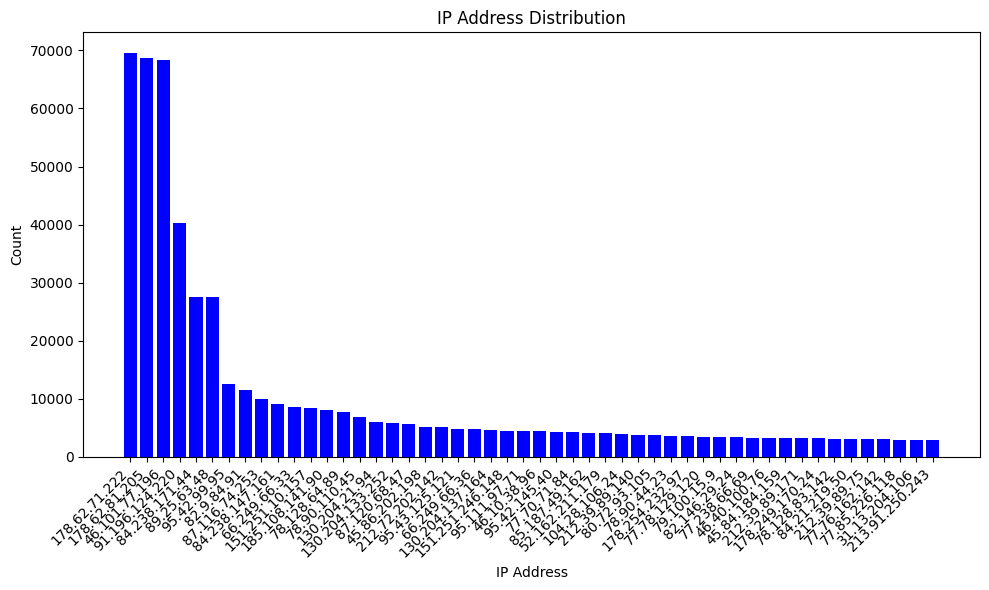

In [32]:
plt.figure(figsize=(10, 6))
plt.bar(host_df['ip_address'].head(50), host_df['count'].head(50), color='blue')
plt.xlabel('IP Address')
plt.ylabel('Count')
plt.title('IP Address Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

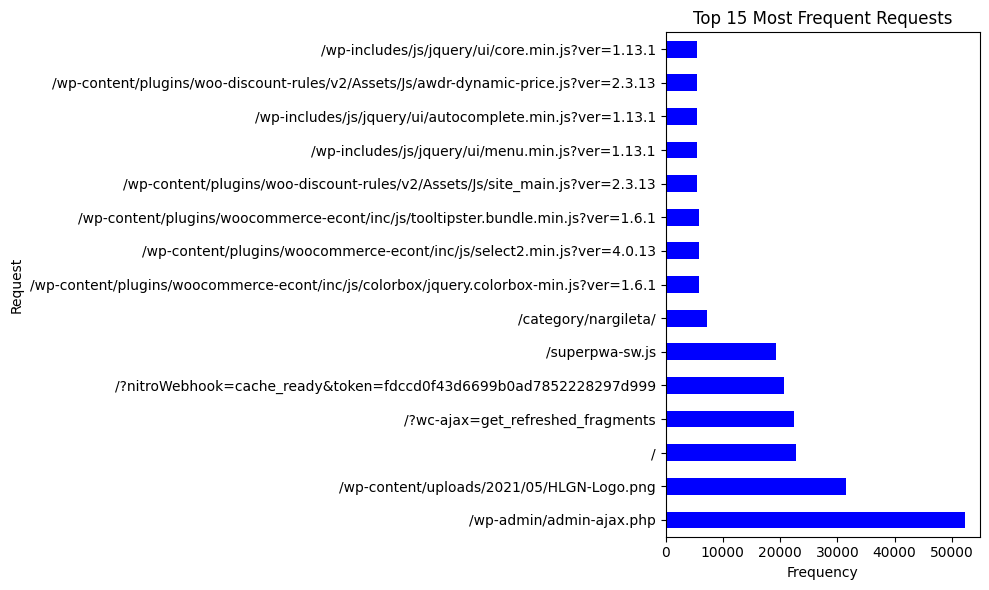

In [33]:
# Calculate the frequency of requests by counting the occurrences of each request
frequency_of_requests = logs_df['request'].value_counts().head(15)
# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
frequency_of_requests.plot(kind='barh', color='blue')
plt.ylabel('Request')
plt.xlabel('Frequency')
plt.title('Top 15 Most Frequent Requests')
plt.tight_layout()
plt.show()

   status    count
0     200  2187390
1     201       12
2     206      163
3     301    14376
4     302     2020
5     303        9
6     304   157070
7     400      117
8     401      542
9     403      136
10    404    53468
11    405      561
12    406     2768
13    421        2
14    500     6824
15    502        1
16    503      178


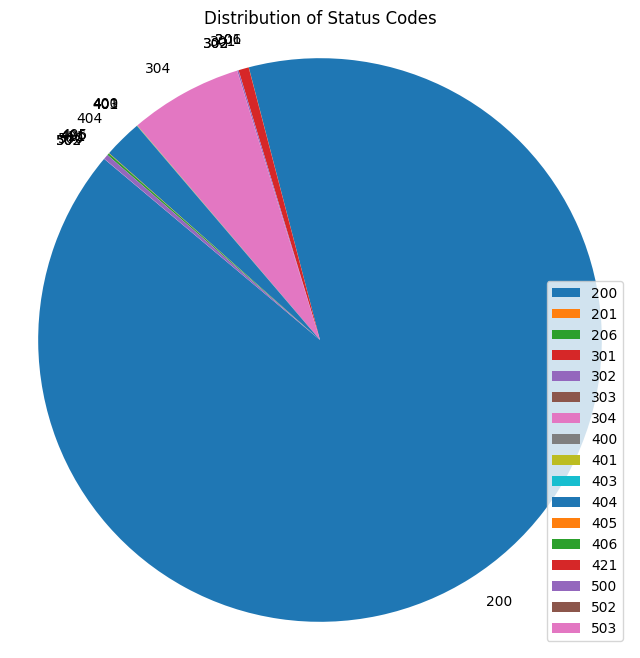

In [37]:
status_df = logs_df.groupby('status').size().reset_index(name='count')
print(status_df)
# Plot the data using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_df['count'], labels=status_df['status'], startangle=140)
plt.title('Distribution of Status Codes')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

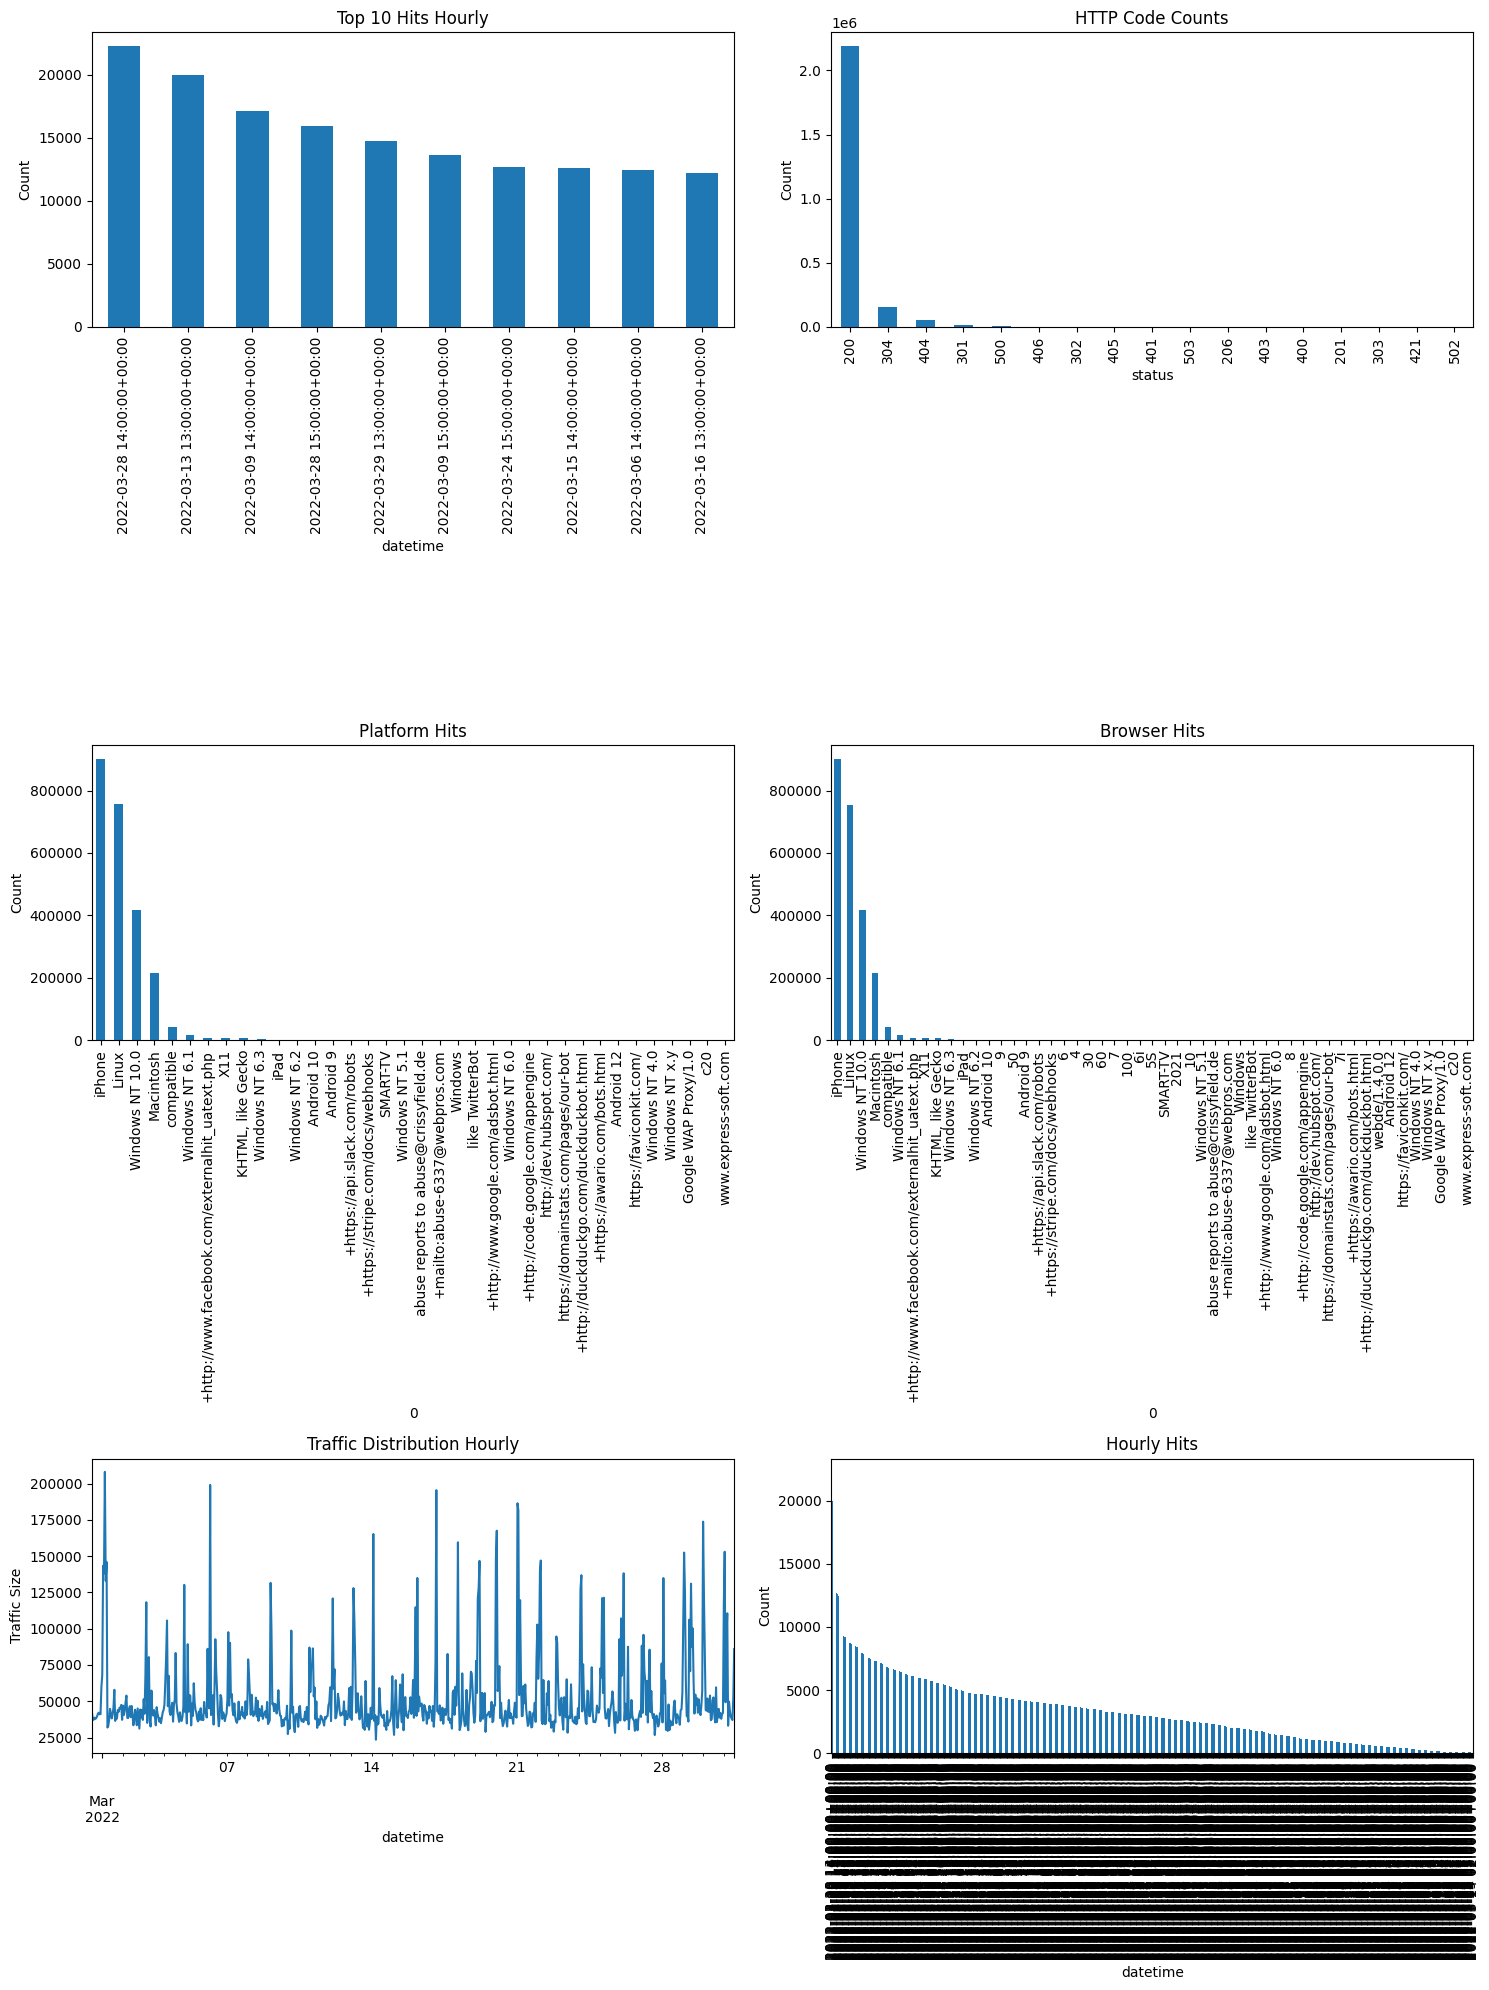

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'datetime' column to datetime format
logs_df['datetime'] = pd.to_datetime(logs_df['datetime'],utc = True)

# Set 'datetime' column as the DataFrame index
logs_df.set_index('datetime', inplace=True)

# 1. Top 10 hits on hourly basis
top_10_hourly_hits = logs_df['client'].resample('H').size().nlargest(10)

# 2. Count total number of http codes
http_code_counts = logs_df['status'].value_counts()

# 3. Total hits per URL
total_hits_per_url = logs_df['request'].value_counts()
url_with_max_hits = total_hits_per_url.idxmax()

# 4. Total hits per platform
platform_hits = logs_df['user_agent'].str.extract(r'\((.*?)\)')[0].str.split(';').str[0].str.strip()
platform_hits_counts = platform_hits.value_counts()

# 5. Total hits per browser
browser_hits = logs_df['user_agent'].str.extract(r'(?<=\()([^()]+)(?=\))')[0].str.split(';').str[0].str.strip()
browser_hits_counts = browser_hits.value_counts()

# 6. Traffic distribution on each site hourly basis
traffic_distribution_hourly = logs_df['size'].resample('H').sum() / logs_df['size'].resample('H').count()

# 7. Total number of hits per hour in descending order
hourly_hits = logs_df.resample('H').size().sort_values(ascending=False)

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# Plot 1: Top 10 hits on hourly basis
top_10_hourly_hits.plot(ax=axes[0, 0], kind='bar', title='Top 10 Hits Hourly')
axes[0, 0].set_ylabel('Count')

# Plot 2: Total hits per http code
http_code_counts.plot(ax=axes[0, 1], kind='bar', title='HTTP Code Counts')
axes[0, 1].set_ylabel('Count')

# Plot 3: Total hits per platform
platform_hits_counts.plot(ax=axes[1, 0], kind='bar', title='Platform Hits')
axes[1, 0].set_ylabel('Count')

# Plot 4: Total hits per browser
browser_hits_counts.plot(ax=axes[1, 1], kind='bar', title='Browser Hits')
axes[1, 1].set_ylabel('Count')

# Plot 5: Traffic distribution on each site hourly basis
traffic_distribution_hourly.plot(ax=axes[2, 0], kind='line', title='Traffic Distribution Hourly')
axes[2, 0].set_ylabel('Traffic Size')

# Plot 6: Total number of hits per hour
hourly_hits.plot(ax=axes[2, 1], kind='bar', title='Hourly Hits')
axes[2, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()